# Business Case: Yulu - Hypothesis Testing

### About Yulu
#### Yulu is India’s leading micro-mobility service provider, which offers unique vehicles for the daily commute. Starting off as a mission to eliminate traffic congestion in India, Yulu provides the safest commute solution through a user-friendly mobile app to enable shared, solo and sustainable commuting.


Yulu zones are located at all the appropriate locations (including metro stations, bus stands, office spaces, residential areas, corporate
offices, etc) to make those first and last miles smooth, affordable, and convenient!
Yulu has recently suffered considerable dips in its revenues. 

They have contracted a consulting company to understand the factors on which the demand for these shared electric cycles depends. 

Specifically, they want to understand the factors affecting the demand for these shared electric cycles in the Indian market.

### Column Profiling:
datetime: datetime

season: season (1: spring, 2: summer, 3: fall, 4: winter)

holiday: whether day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
workingday: if day is neither weekend nor holiday is 1, otherwise is 0.

weather:
1: Clear, Few clouds, partly cloudy, partly cloudy
2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

temp: temperature in Celsius

atemp: feeling temperature in Celsius

humidity: humidity

windspeed: wind speed

casual: count of casual users

registered: count of registered users

count: count of total rental bikes including both casual and registered

## Problem Statement

Import the dataset and do usual exploratory data analysis steps like checking the structure & characteristics of the dataset

Try establishing a relation between the dependent and independent variable (Dependent “Count” & Independent: Workingday,
Weather, Season etc)

Select an appropriate test to check whether:
     Working Day has effect on number of electric cycles rented
     No. of cycles rented similar or different in different seasons
     No. of cycles rented similar or different in different weather
     Weather is dependent on season (check between 2 predictor variable)
     
Set up Null Hypothesis (H0)

State the alternate hypothesis (H1)

Check assumptions of the test (Normality, Equal Variance). You can check it using Histogram, Q-Q plot or statistical methods like

levene’s test, Shapiro-wilk test (optional)

Please continue doing the analysis even If some assumptions fail (levene’s test or Shapiro-wilk test) but double check using
visual analysis and report wherever necessary

Set a significance level (alpha)

Calculate test Statistics.

Decision to accept or reject null hypothesis.

Inference from the analysis

In [4]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import missingno as msno

In [5]:
df=pd.read_csv('yulu_sharing.csv')
df


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


In [6]:
df.shape

(10886, 12)

Number of rows=10886 , 
Number of columns=12

In [7]:
# coulmns
df.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

In [8]:
df.dtypes

datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
casual          int64
registered      int64
count           int64
dtype: object

here data type of datetime is in object form, so we have to convert it.

In [9]:
df['datetime']=pd.to_datetime(df['datetime'])

In [10]:
df.dtypes

datetime      datetime64[ns]
season                 int64
holiday                int64
workingday             int64
weather                int64
temp                 float64
atemp                float64
humidity               int64
windspeed            float64
casual                 int64
registered             int64
count                  int64
dtype: object

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


In [12]:
# checking if there is any null values

df.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

<AxesSubplot:>

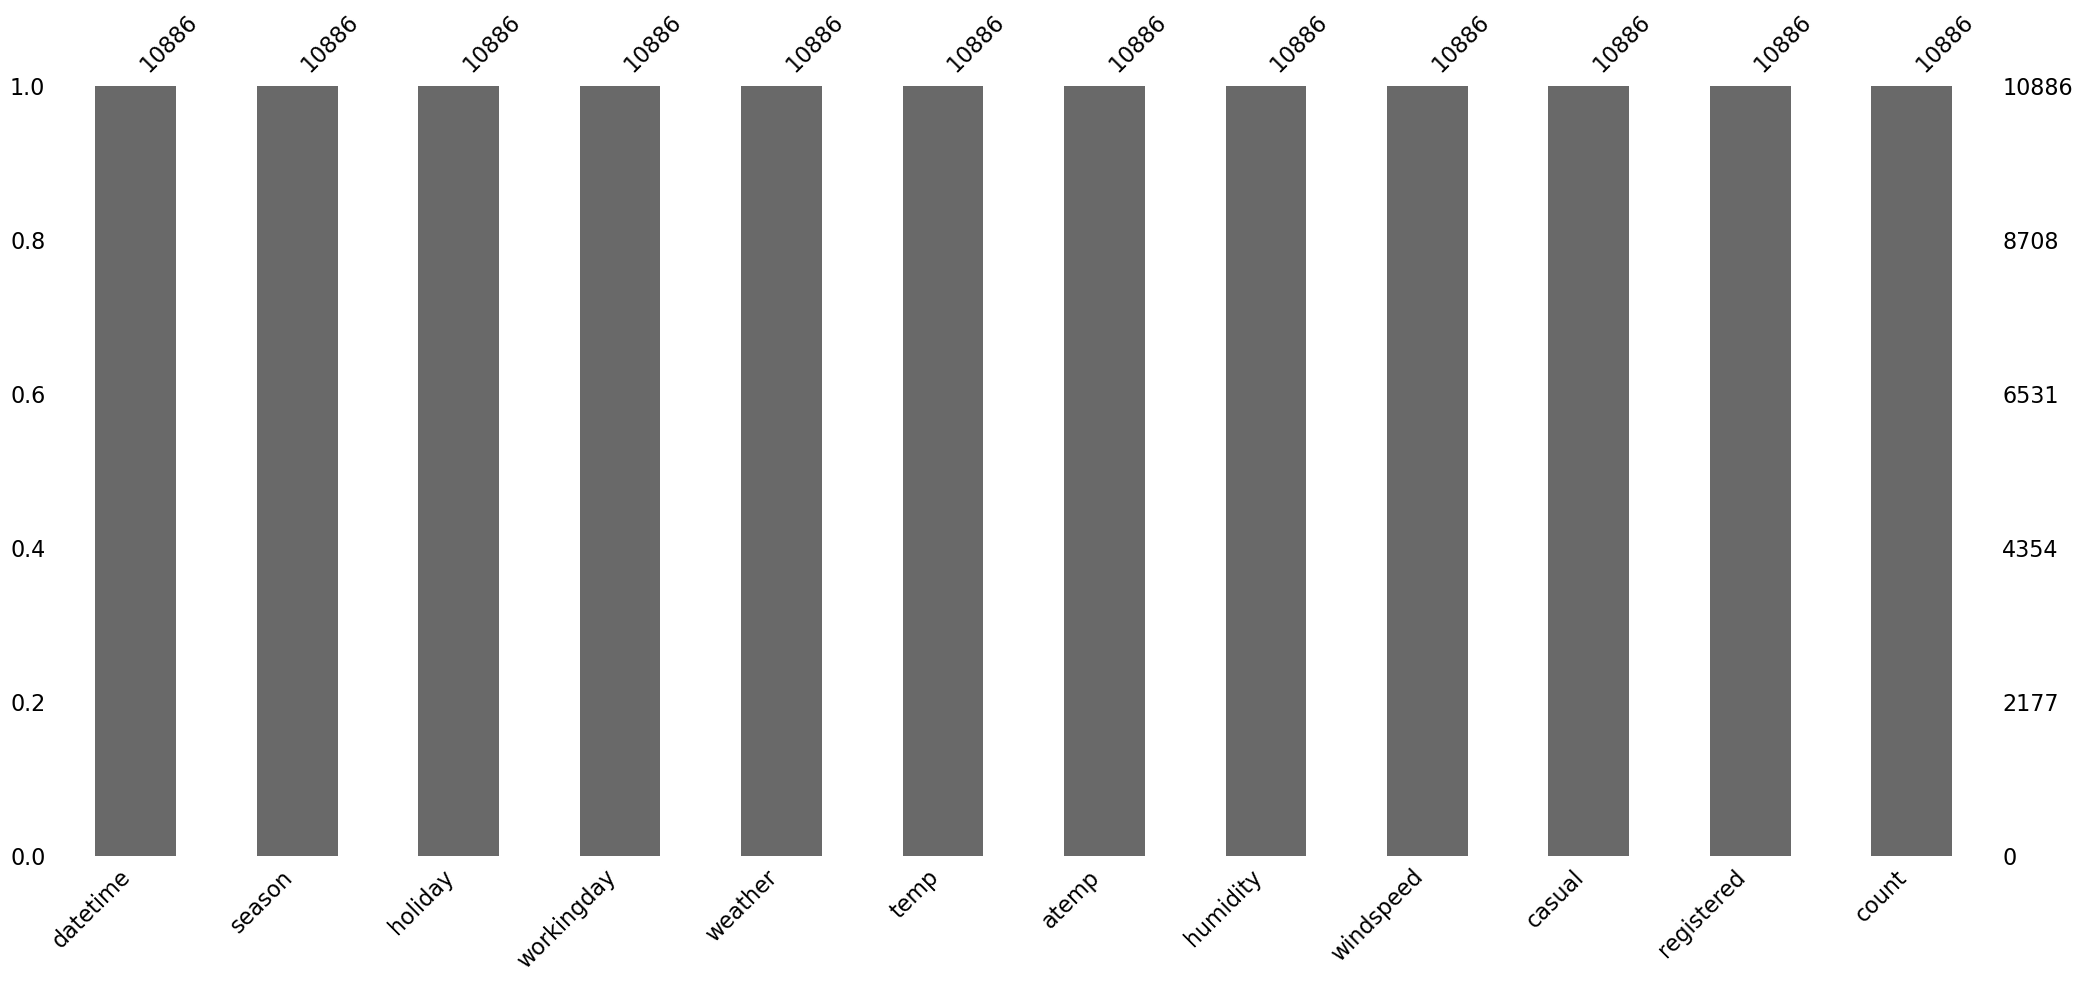

In [13]:
#visualization of null values present in the dataset
msno.bar(df)

#### there is no null values in the dataset

In [14]:
#number of unique values 
for i in df.columns:
 print(i,':',df[i].nunique())

datetime : 10886
season : 4
holiday : 2
workingday : 2
weather : 4
temp : 49
atemp : 60
humidity : 89
windspeed : 28
casual : 309
registered : 731
count : 822


In [15]:
# unique values in our numerical data
for i in df.columns:
 print(i,':',df[i].unique())

datetime : ['2011-01-01T00:00:00.000000000' '2011-01-01T01:00:00.000000000'
 '2011-01-01T02:00:00.000000000' ... '2012-12-19T21:00:00.000000000'
 '2012-12-19T22:00:00.000000000' '2012-12-19T23:00:00.000000000']
season : [1 2 3 4]
holiday : [0 1]
workingday : [0 1]
weather : [1 2 3 4]
temp : [ 9.84  9.02  8.2  13.12 15.58 14.76 17.22 18.86 18.04 16.4  13.94 12.3
 10.66  6.56  5.74  7.38  4.92 11.48  4.1   3.28  2.46 21.32 22.96 23.78
 24.6  19.68 22.14 20.5  27.06 26.24 25.42 27.88 28.7  30.34 31.16 29.52
 33.62 35.26 36.9  32.8  31.98 34.44 36.08 37.72 38.54  1.64  0.82 39.36
 41.  ]
atemp : [14.395 13.635 12.88  17.425 19.695 16.665 21.21  22.725 21.97  20.455
 11.365 10.605  9.85   8.335  6.82   5.305  6.06   9.09  12.12   7.575
 15.91   3.03   3.79   4.545 15.15  18.18  25.    26.515 27.275 29.545
 23.485 25.76  31.06  30.305 24.24  18.94  31.82  32.575 33.335 28.79
 34.85  35.605 37.12  40.15  41.665 40.91  39.395 34.09  28.03  36.365
 37.88  42.425 43.94  38.635  1.515  0.76   2.2

In [16]:
# value_counts
for i in df.columns:
 print(i,':',df[i].value_counts())

datetime : 2011-01-01 00:00:00    1
2012-05-01 21:00:00    1
2012-05-01 13:00:00    1
2012-05-01 14:00:00    1
2012-05-01 15:00:00    1
                      ..
2011-09-02 04:00:00    1
2011-09-02 05:00:00    1
2011-09-02 06:00:00    1
2011-09-02 07:00:00    1
2012-12-19 23:00:00    1
Name: datetime, Length: 10886, dtype: int64
season : 4    2734
2    2733
3    2733
1    2686
Name: season, dtype: int64
holiday : 0    10575
1      311
Name: holiday, dtype: int64
workingday : 1    7412
0    3474
Name: workingday, dtype: int64
weather : 1    7192
2    2834
3     859
4       1
Name: weather, dtype: int64
temp : 14.76    467
26.24    453
28.70    427
13.94    413
18.86    406
22.14    403
25.42    403
16.40    400
22.96    395
27.06    394
24.60    390
12.30    385
21.32    362
17.22    356
13.12    356
29.52    353
10.66    332
18.04    328
20.50    327
30.34    299
9.84     294
15.58    255
9.02     248
31.16    242
8.20     229
27.88    224
23.78    203
32.80    202
11.48    181
19.68   

# Outliers

In [17]:
df.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


the difference between mean and median in casual,registered and count are noticebale. find the outlire values in these 

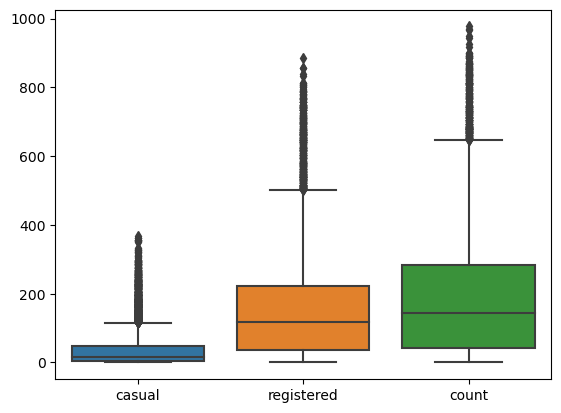

In [18]:
plt.figure()

sns.boxplot(data=df[['casual','registered','count']])
plt.show()

In [19]:
# removing outliers using IQR method
df1=df.copy()
a=['casual','registered','count']
for i in a:
 q1=df[i].quantile(.25)
 q3=df[i].quantile(.75)
 iqr=q3-q1
 lower=q1-(1.5*iqr)
 upper=q3+(1.5*iqr)
 print('lower limit of',i,'=',lower)
 print('upper limit of',i,'=',upper)
 print('\n')
 df1=df1[~((df1[i]<lower)|(df1[i]>upper))]
df1

lower limit of casual = -63.5
upper limit of casual = 116.5


lower limit of registered = -243.0
upper limit of registered = 501.0


lower limit of count = -321.0
upper limit of count = 647.0




,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


#### after removing outliers we got a dataset of 9744 rows

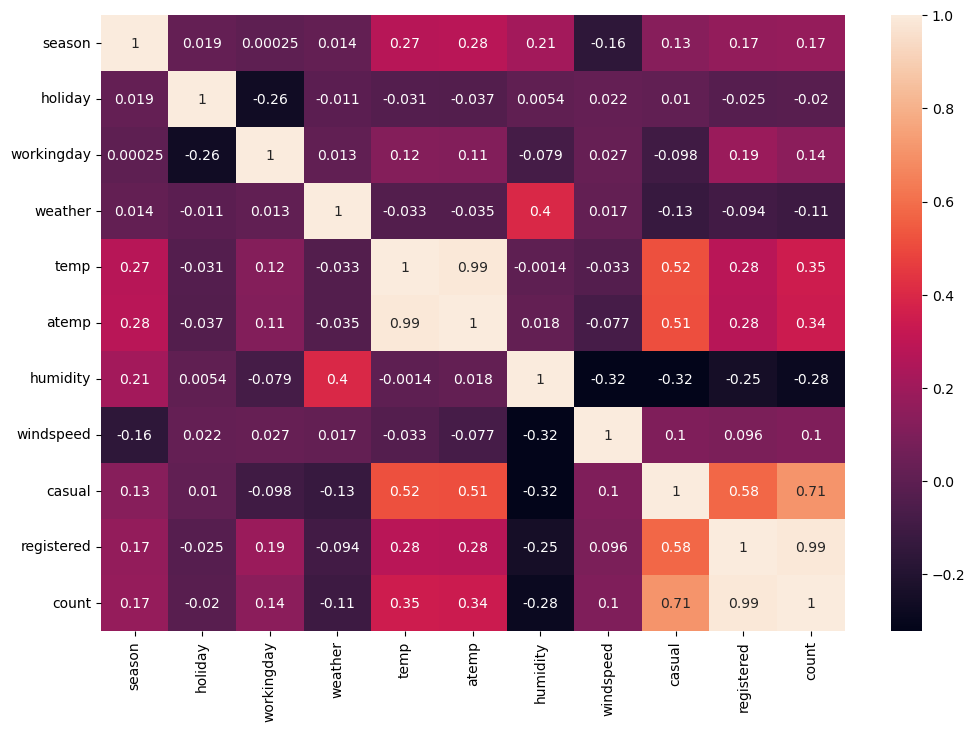

In [20]:
#heatmap

plt.figure(figsize=(12,8))
sns.heatmap(df1.corr(), annot=True)
plt.show()

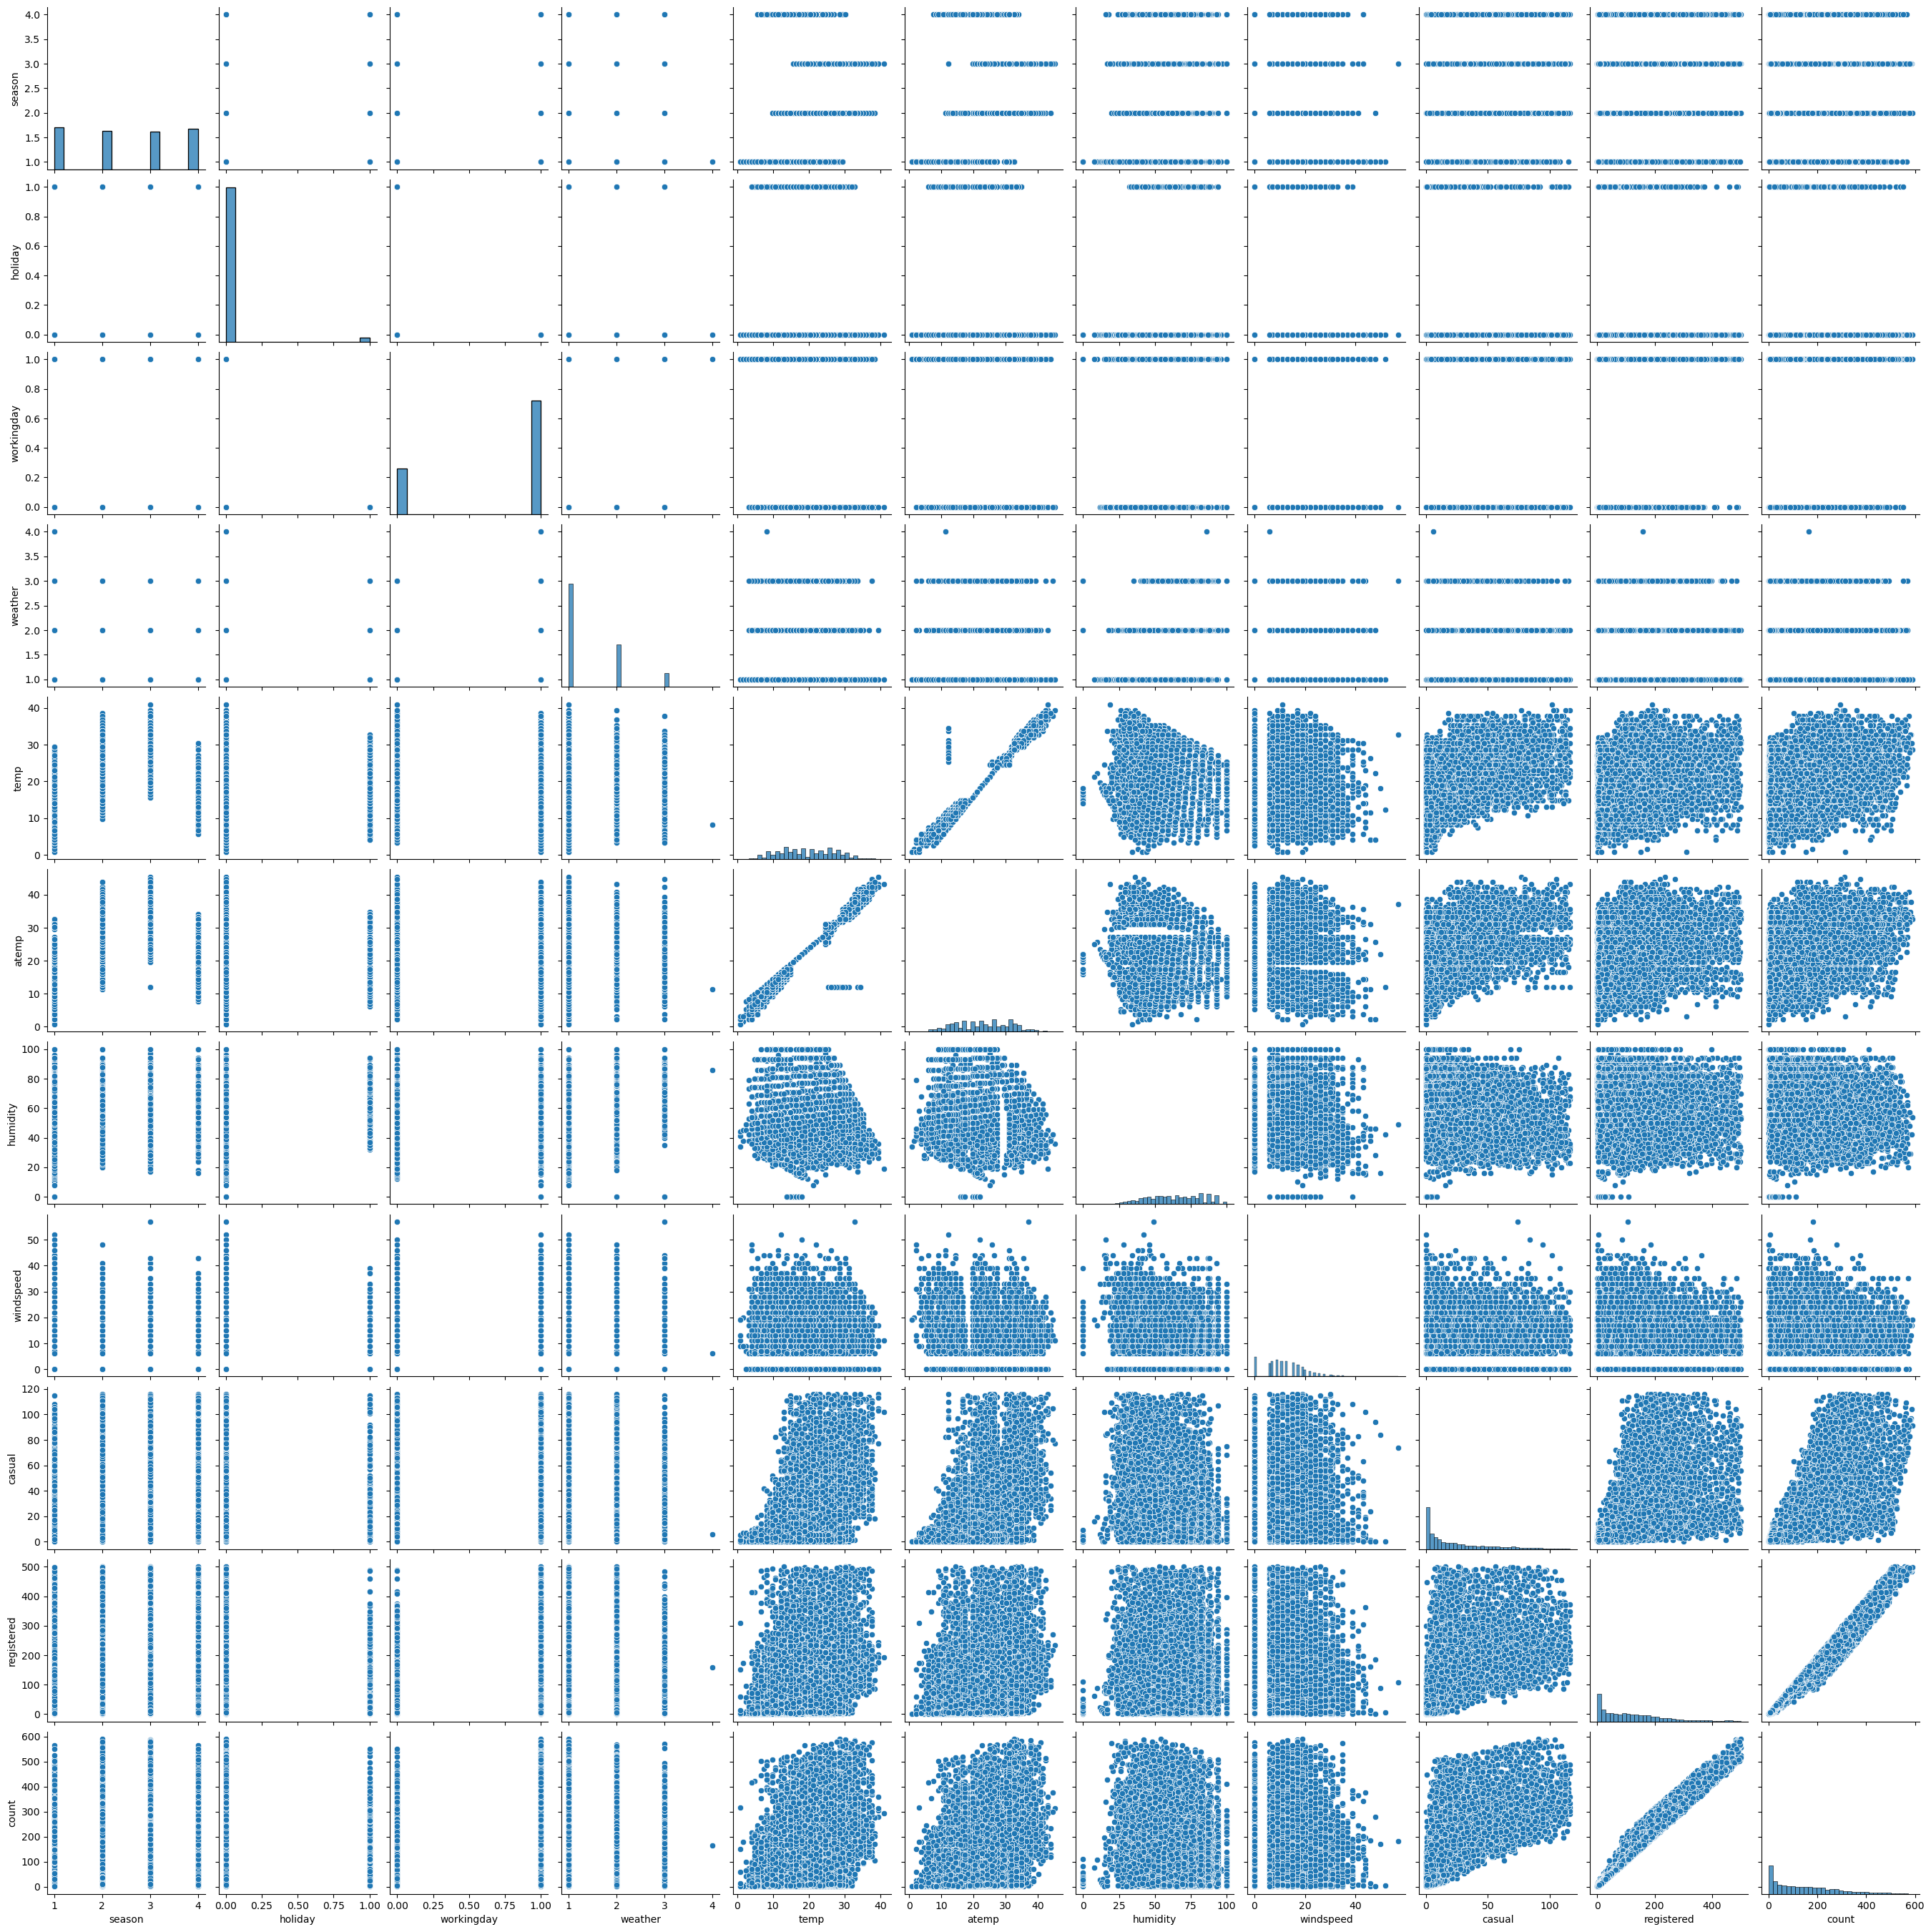

In [21]:
# pair plot

sns.pairplot(data=df1)


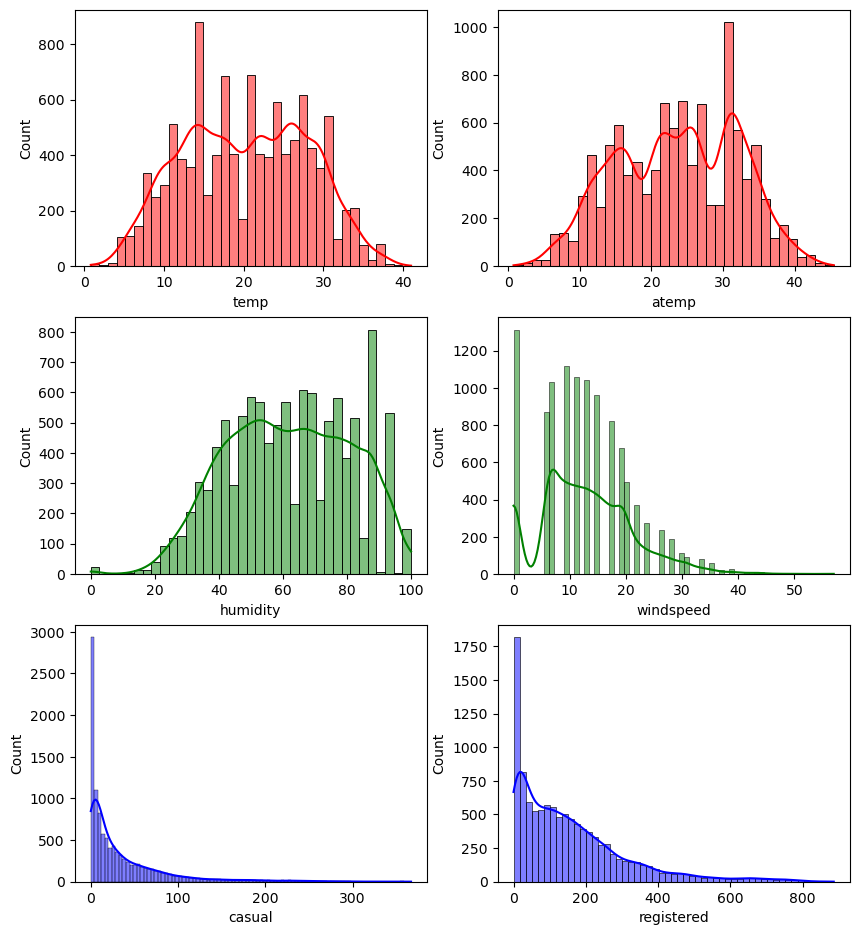

In [22]:
fig, axis = plt.subplots(nrows=3, ncols=2, figsize=(10,8))
fig.subplots_adjust(top=1.2)
sns.histplot(data=df, x="temp", kde=True,color="red", ax=axis[0,0])
sns.histplot(data=df, x="atemp", kde=True,color="red", ax=axis[0,1])
sns.histplot(data=df, x="humidity", kde=True,color="green", ax=axis[1,0])
sns.histplot(data=df, x="windspeed", kde=True,color="green", ax=axis[1,1])
sns.histplot(data=df, x="casual", kde=True,color="blue", ax=axis[2,0])
sns.histplot(data=df, x="registered", kde=True,color="blue", ax=axis[2,1])
plt.show()

In [23]:
df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


### Analyzing working days and holidays

In [24]:
df.workingday.value_counts()

1    7412
0    3474
Name: workingday, dtype: int64

<AxesSubplot:>

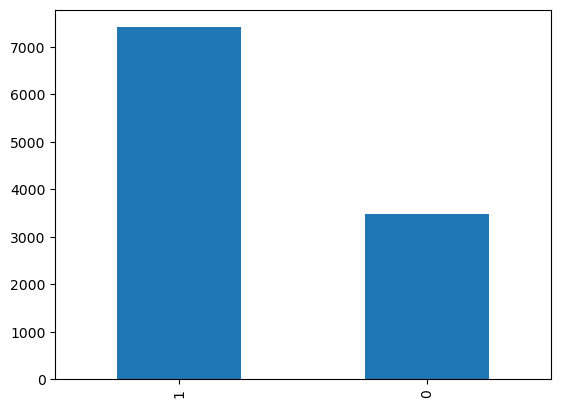

In [25]:
df.workingday.value_counts().plot(kind='bar')

In [26]:
df.holiday.value_counts()

0    10575
1      311
Name: holiday, dtype: int64

<AxesSubplot:>

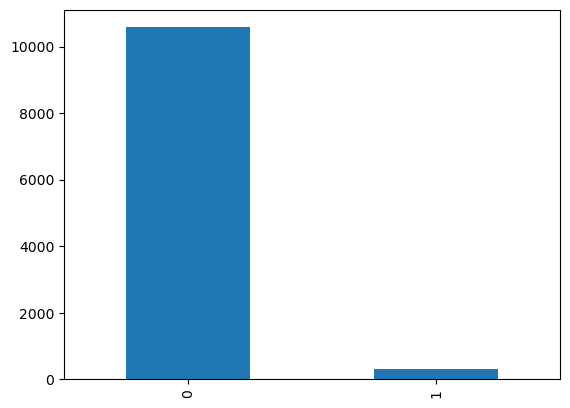

In [27]:
df.holiday.value_counts().plot(kind='bar')

## weather and total user

In [28]:
x=df.groupby('weather')['count'].sum().reset_index()
x


,weather,count
0,1,1476063
1,2,507160
2,3,102089
3,4,164


<AxesSubplot:xlabel='weather', ylabel='count'>

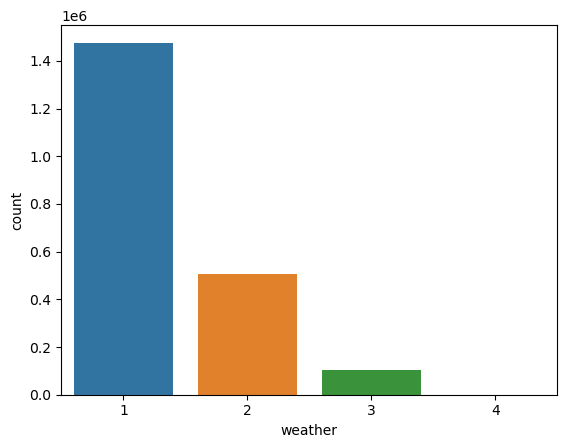

In [29]:
sns.barplot(x='weather',y='count',data=x)

In [30]:
y=df.groupby('weather')['count'].mean().reset_index()
y


,weather,count
0,1,205.236791
1,2,178.955540
2,3,118.846333
3,4,164.000000


<AxesSubplot:xlabel='weather', ylabel='count'>

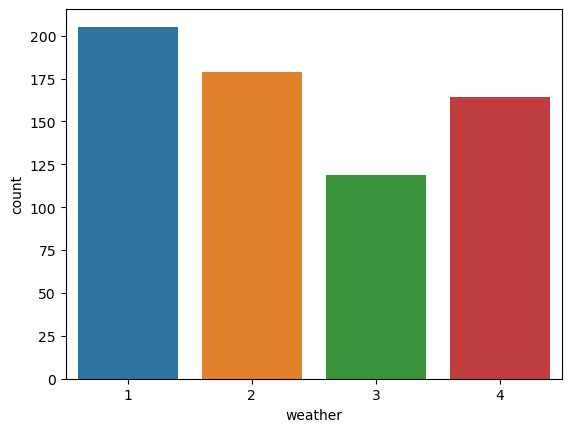

In [31]:
sns.barplot(x='weather',y='count',data=y)

### temperature and total user

In [32]:
x1=df.groupby('temp')['count'].sum().reset_index()
x1


,temp,count
0,0.82,544
1,1.64,183
2,2.46,215
3,3.28,212
4,4.10,2212
5,4.92,3505
6,5.74,5696
7,6.56,9944
8,7.38,7182
9,8.20,18777


In [33]:
y1=df.groupby('temp')['count'].mean().reset_index()
y1

,temp,count
0,0.82,77.714286
1,1.64,91.500000
2,2.46,43.000000
3,3.28,19.272727
4,4.10,50.272727
5,4.92,58.416667
6,5.74,53.233645
7,6.56,68.109589
8,7.38,67.754717
9,8.20,81.995633


Text(0.5, 1.0, 'mean of users')

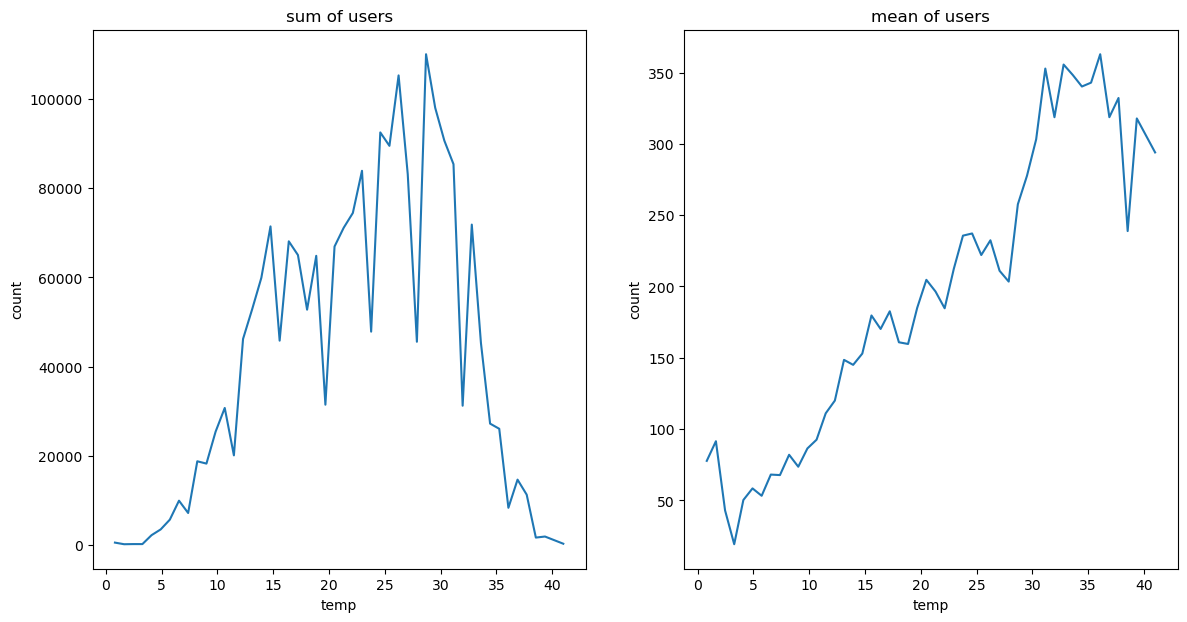

In [34]:
plt.figure(figsize=(14,7))
plt.subplot(121)
sns.lineplot(x='temp',y='count',data=x1)
plt.title('sum of users')
plt.subplot(122)
sns.lineplot(x='temp',y='count',data=y1)
plt.title('mean of users')

### atempt and total user

In [35]:
x2=df.groupby('atemp')['count'].sum().reset_index()
x2


,atemp,count
0,0.760,2
1,1.515,3
2,2.275,266
3,3.030,576
4,3.790,625
5,4.545,727
6,5.305,1580
7,6.060,4736
8,6.820,3552
9,7.575,4195


In [36]:
y2=df.groupby('atemp')['count'].mean().reset_index()
y2

,atemp,count
0,0.760,1.000000
1,1.515,3.000000
2,2.275,38.000000
3,3.030,82.285714
4,3.790,39.062500
5,4.545,66.090909
6,5.305,63.200000
7,6.060,64.876712
8,6.820,56.380952
9,7.575,55.933333


Text(0.5, 1.0, 'mean of users')

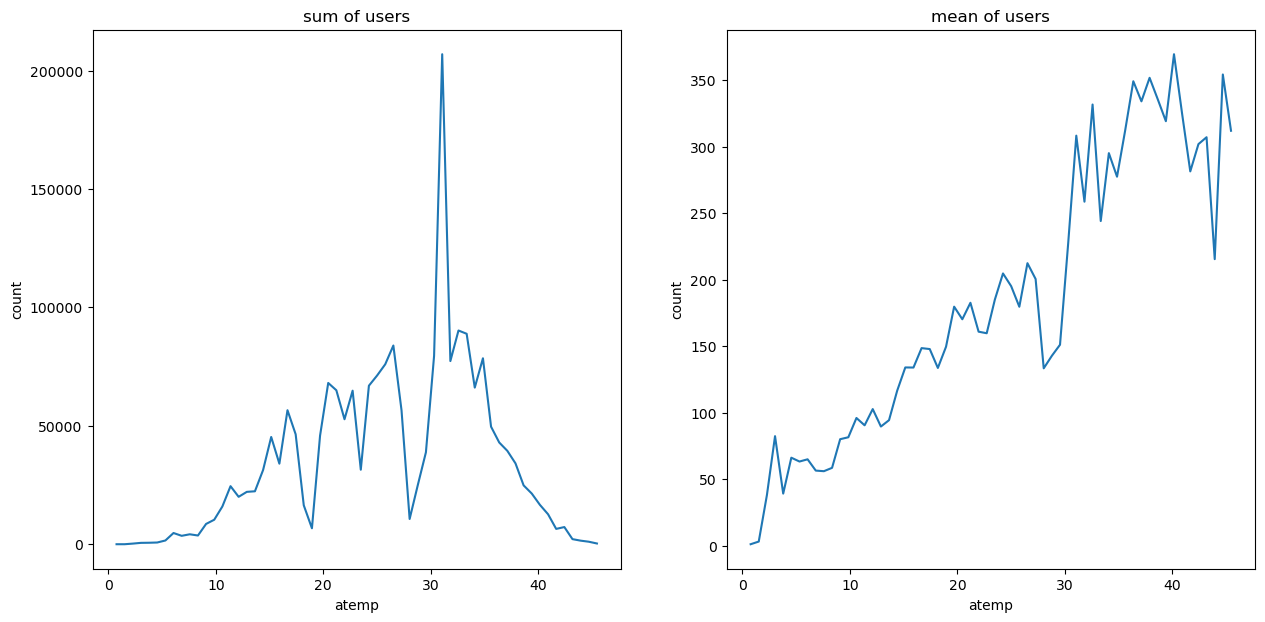

In [37]:
plt.figure(figsize=(15,7))
plt.subplot(121)
sns.lineplot(x='atemp',y='count',data=x2)
plt.title('sum of users')
plt.subplot(122)
sns.lineplot(x='atemp',y='count',data=y2)
plt.title('mean of users')


### humidity and total user

In [38]:
x1=df.groupby('humidity')['count'].sum().reset_index()
x1


,humidity,count
0,0,623
1,8,77
2,10,107
3,12,29
4,13,17
...,...,...
84,93,14586
85,94,28666
86,96,71
87,97,64


In [39]:
y1=df.groupby('humidity')['count'].mean().reset_index()
y1

,humidity,count
0,0,28.318182
1,8,77.000000
2,10,107.000000
3,12,29.000000
4,13,17.000000
...,...,...
84,93,71.151220
85,94,88.475309
86,96,71.000000
87,97,64.000000


Text(0.5, 1.0, 'mean of users')

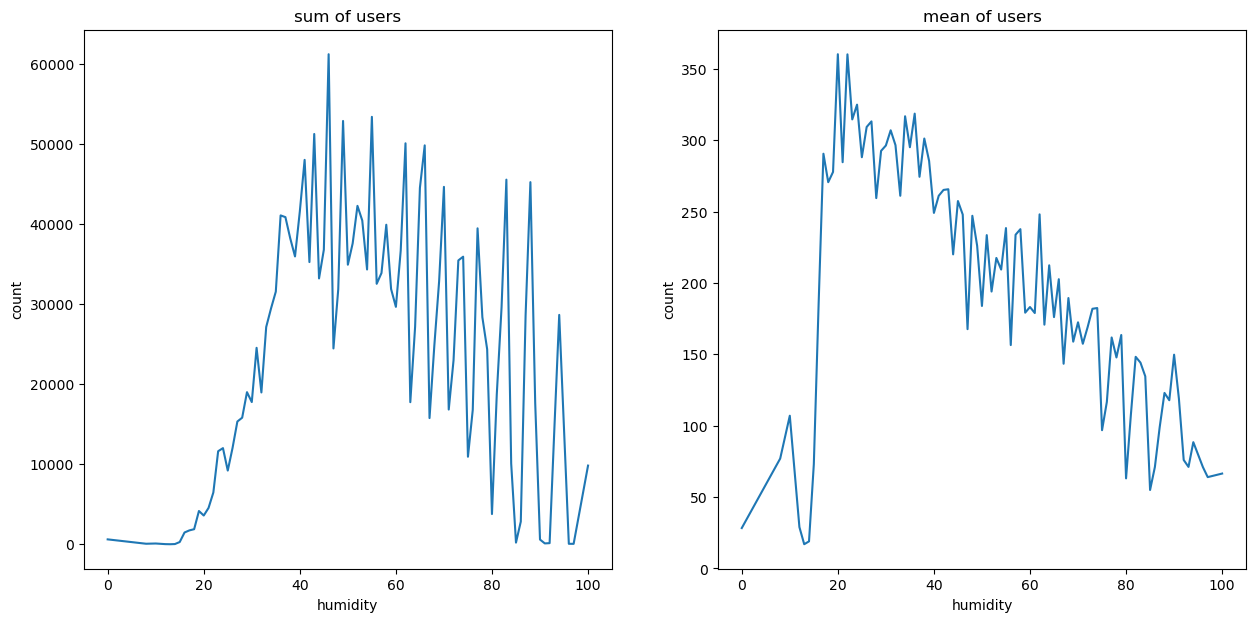

In [40]:
plt.figure(figsize=(15,7))
plt.subplot(121)
sns.lineplot(x='humidity',y='count',data=x1)
plt.title('sum of users')
plt.subplot(122)
sns.lineplot(x='humidity',y='count',data=y1)
plt.title('mean of users')


### windspeed and total user

In [41]:
x1=df.groupby('windspeed')['count'].sum().reset_index()
x1


,windspeed,count
0,0.0000,211526
1,6.0032,128938
2,7.0015,175627
3,8.9981,196723
4,11.0014,213791
5,12.9980,210744
6,15.0013,202611
7,16.9979,177034
8,19.0012,147403
9,19.9995,110816


In [42]:
y1=df.groupby('windspeed')['count'].mean().reset_index()
y1

,windspeed,count
0,0.0000,161.101295
1,6.0032,147.864679
2,7.0015,169.852031
3,8.9981,175.645536
4,11.0014,202.262062
5,12.9980,202.249520
6,15.0013,210.833507
7,16.9979,214.847087
8,19.0012,218.051775
9,19.9995,225.235772


Text(0.5, 1.0, 'mean of users')

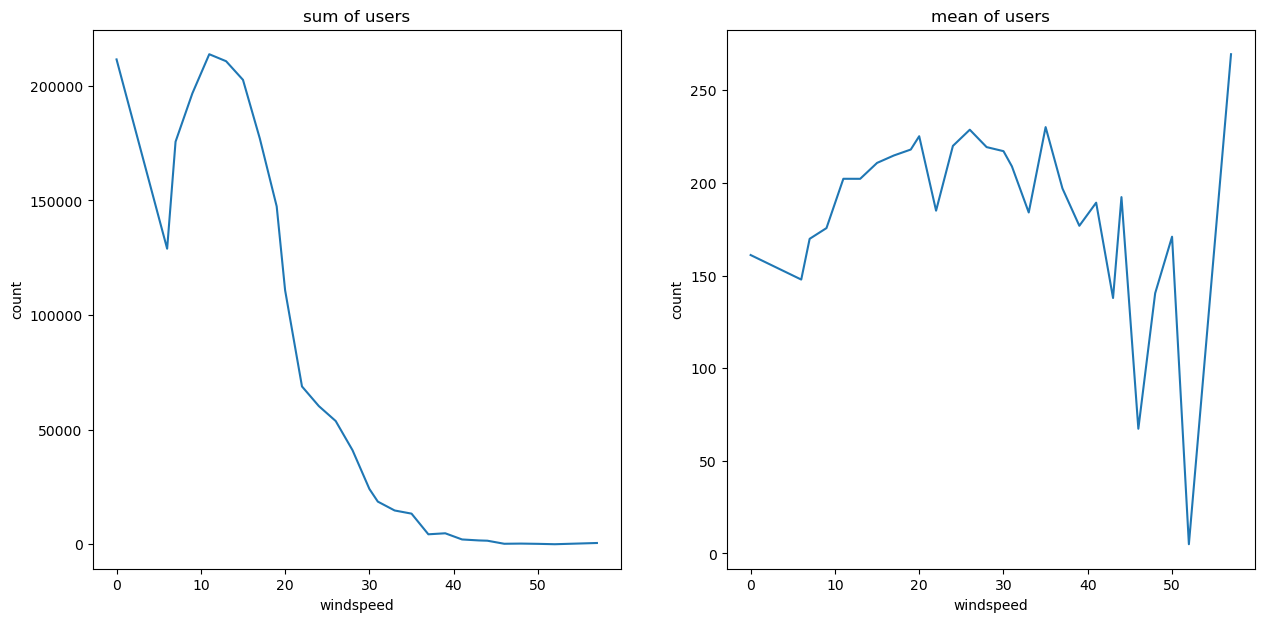

In [43]:
plt.figure(figsize=(15,7))
plt.subplot(121)
sns.lineplot(x='windspeed',y='count',data=x1)
plt.title('sum of users')
plt.subplot(122)
sns.lineplot(x='windspeed',y='count',data=y1)
plt.title('mean of users')


### No of user counts in holidays without saturdays and sundays


<AxesSubplot:xlabel='holiday'>

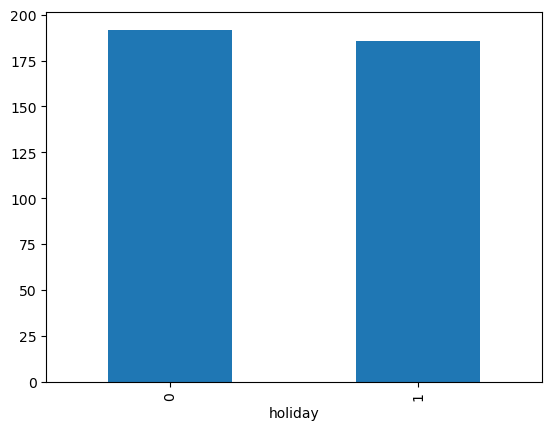

In [44]:
df.groupby('holiday')['count'].mean().plot(kind='bar')


users are less in holidays

<AxesSubplot:xlabel='workingday'>

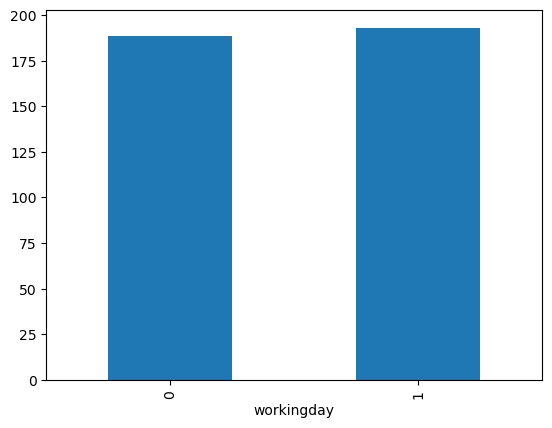

In [45]:
df.groupby('workingday')['count'].mean().plot(kind='bar')


we can see that mean users are slightly higher in workingdays

## Average no. of users per week and per month

In [46]:
df['weekday'] = df['datetime'].dt.day_name()
df['year'] = df['datetime'].dt.year
df['month'] = df['datetime'].dt.month_name()
df['day'] = df['datetime'].dt.day
df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,weekday,year,month,day
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,Saturday,2011,January,1
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,Saturday,2011,January,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,Saturday,2011,January,1
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,Saturday,2011,January,1
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,Saturday,2011,January,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,Wednesday,2012,December,19
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,Wednesday,2012,December,19
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,Wednesday,2012,December,19
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,Wednesday,2012,December,19


In [61]:
weekday_count_df = df.groupby('weekday')['count'].mean().sort_values(ascending=False).reset_index()
month_count_df = df.groupby('month')['count'].mean().sort_values(ascending=False).reset_index()
weekday_count_df

,weekday,count
0,Friday,197.844343
1,Thursday,197.296201
2,Saturday,196.665404
3,Monday,190.390716
4,Tuesday,189.723847
5,Wednesday,188.411348
6,Sunday,180.839772


In [62]:
month_count_df

,month,count
0,June,242.031798
1,July,235.325658
2,August,234.118421
3,September,233.805281
4,October,227.699232
5,May,219.459430
6,November,193.677278
7,April,184.160616
8,December,175.614035
9,March,148.169811


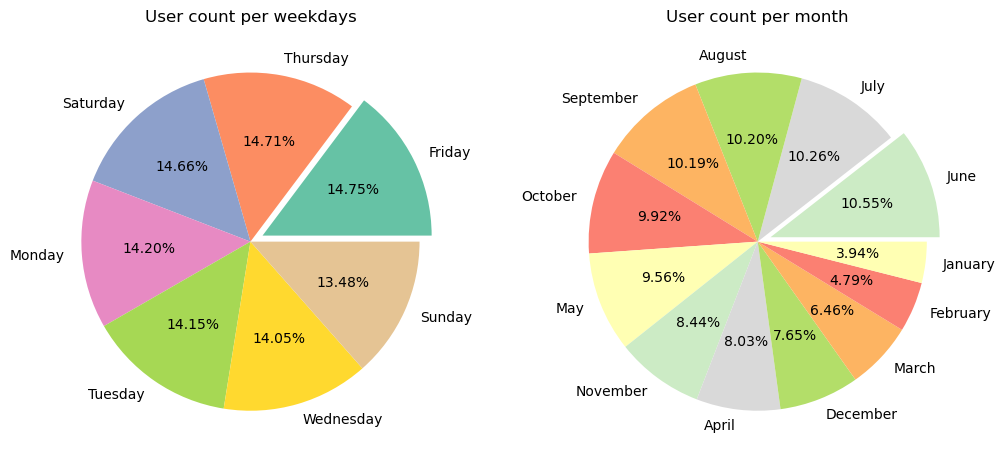

In [66]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

palette_color = sns.color_palette('Set2')
axs[0].pie(data=weekday_count_df, x=weekday_count_df['count'], colors=palette_color, labels=['Friday','Thursday','Saturday', 'Monday', 'Tuesday','Wednesday','Sunday'], explode=(0.08,0,0,0,0,0,0), autopct='%0.2f%%')
axs[0].set_title("User count per weekdays")

palette_color = sns.color_palette('Set3_r')
axs[1].pie(data=month_count_df, x=month_count_df['count'], colors=palette_color, labels=['June', 'July','August', 'September', 'October', 'May','November','April','December','March','February','January' ], explode=(0.08,0,0,0,0,0,0,0,0,0,0,0), autopct='%0.2f%%')
axs[1].set_title("User count per month")
plt.show()

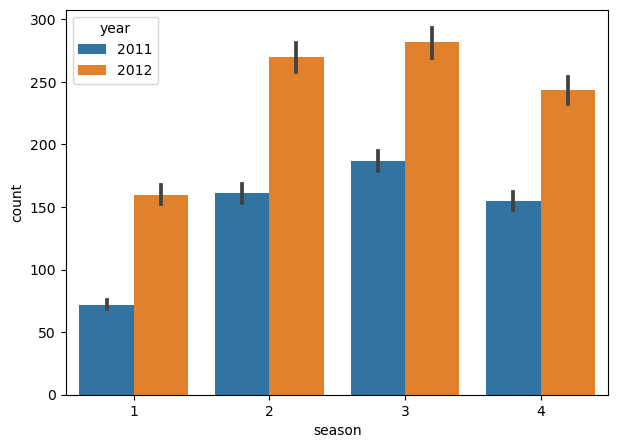

In [67]:
plt.figure(figsize=(7,5))
sns.barplot(data=df, x='season',y='count',hue='year')
plt.show()

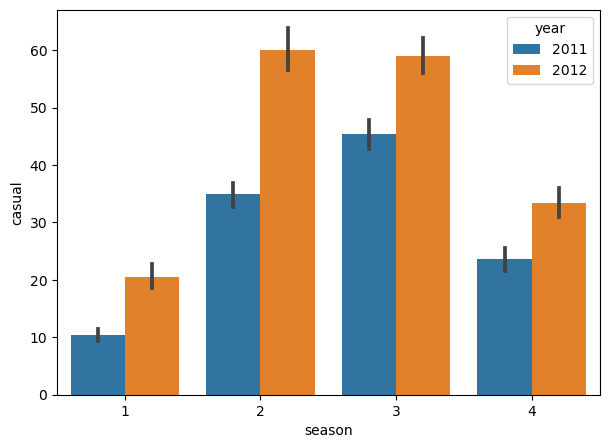

In [69]:
plt.figure(figsize=(7,5))
sns.barplot(data=df,x='season',y='casual',hue='year')
plt.show()

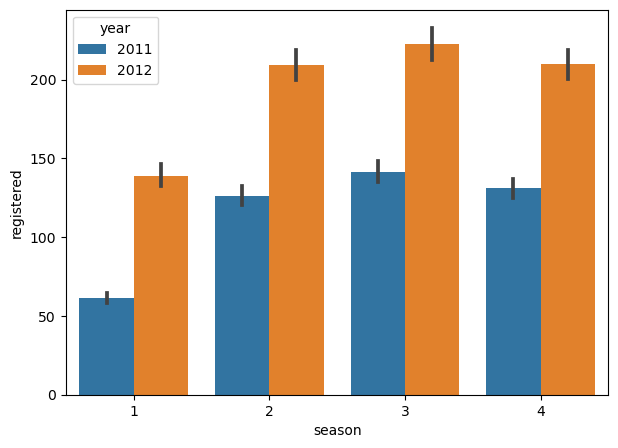

In [70]:
plt.figure(figsize=(7,5))
sns.barplot(data=df,x='season',y='registered',hue='year')
plt.show()

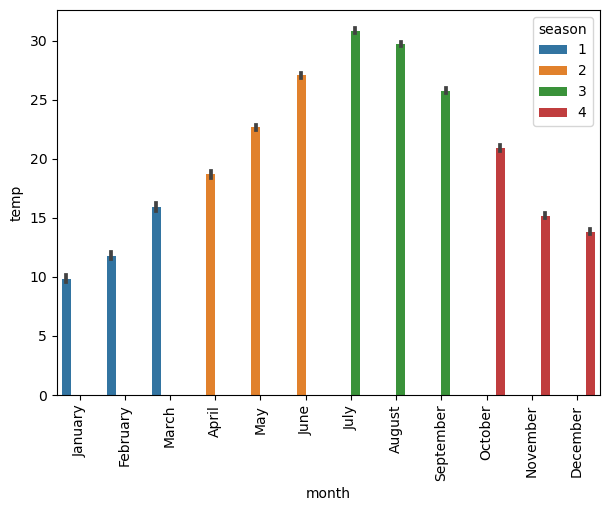

In [71]:
plt.figure(figsize=(7,5))
sns.barplot(x='month',y='temp',hue='season',data=df)
plt.xticks(rotation=90)
plt.show()

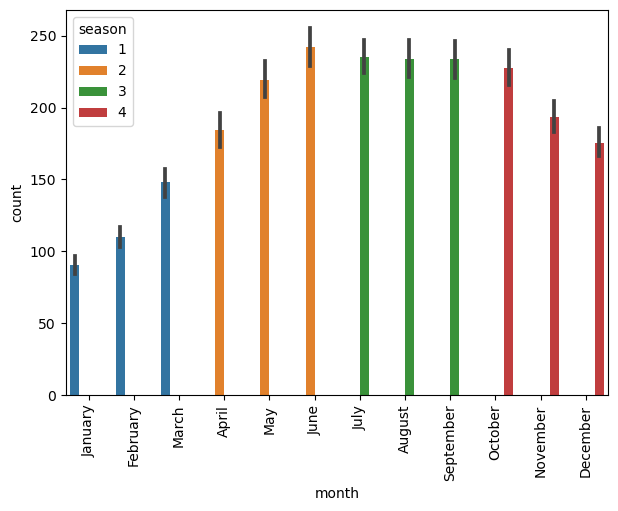

In [72]:
plt.figure(figsize=(7,5))
sns.barplot(data=df, x='month',y='count',hue='season')
plt.xticks(rotation=90)
plt.show()

### Chi-square test to check if Weather is dependent on the season


Null hypothes,is H0 - Weather is Independent on season. 
Alternative hypothesis, H1-Weather is dependent on season

In [47]:
df_ws = pd.crosstab(df.weather,df.season,margins=True,margins_name='Total')
df_ws


season,1,2,3,4,Total
weather,,,,,
1,1759,1801,1930,1702,7192
2,715,708,604,807,2834
3,211,224,199,225,859
4,1,0,0,0,1
Total,2686,2733,2733,2734,10886


In [48]:
# Above weather 4 has less expected count so not include 4 
df_w=df[-(df['weather']==4)]
df_ws = pd.crosstab(df_w.weather,df_w.season,margins=True,margins_name='Total')
df_ws

season,1,2,3,4,Total
weather,,,,,
1,1759,1801,1930,1702,7192
2,715,708,604,807,2834
3,211,224,199,225,859
Total,2685,2733,2733,2734,10885


In [49]:
stat, p_value, dof, expected = stats.chi2_contingency(df_ws)
print('stat_value =',stat)
print('p_value =',p_value)
print('dof =',dof)
print('expected =',expected)

stat_value = 46.10145731073249
p_value = 6.664576536706683e-06
dof = 12
expected = [[ 1774.04869086  1805.76352779  1805.76352779  1806.42425356
   7192.        ]
 [  699.06201194   711.55920992   711.55920992   711.81956821
   2834.        ]
 [  211.8892972    215.67726229   215.67726229   215.75617823
    859.        ]
 [ 2685.          2733.          2733.          2734.
  10885.        ]]


In [50]:
alpha = 0.05
if p_value >= alpha:
 print('We Accept the Null Hypothesis : Weather is Independent on season ')
else:
 print('We reject the Null Hypothesis : Weather is dependent on season ')

We reject the Null Hypothesis : Weather is dependent on season 


In [51]:
# We can see that p_value is less than significant value(0.05) so we reject null hypothesis. So, Weather is dependent on season


# Chi-square test to check if Weather is workingday on the season

In [52]:
#H0 = workingday is Independent on season
#H1 = workingday is dependent on season
df_count_season = pd.crosstab(df.workingday,df.season,margins=True,margins_name='Total')
df_count_season

season,1,2,3,4,Total
workingday,,,,,
0,858,840,888,888,3474
1,1828,1893,1845,1846,7412
Total,2686,2733,2733,2734,10886


In [53]:
stat, p_value, dof, expected = stats.chi2_contingency(df_count_season)
stat, p_value, dof, expected


(2.5708953973429574,
 0.9583429307736173,
 8,
 array([[  857.17104538,   872.16994305,   872.16994305,   872.48906853,
          3474.        ],
        [ 1828.82895462,  1860.83005695,  1860.83005695,  1861.51093147,
          7412.        ],
        [ 2686.        ,  2733.        ,  2733.        ,  2734.        ,
         10886.        ]]))

In [54]:
alpha = 0.05
if p_value >= alpha:
 print('We Accept the Null Hypothesis : Workingday is Independent on season ')
else:
 print('We reject the Null Hypothesis : Workingday is dependent on season ')

We Accept the Null Hypothesis : Workingday is Independent on season 


#### We can see that p_value is greater than significant value(0.05) so we accept null hypothesis. So, Workingday is Independent on season

# ANNOVA to check if No. of cycles rented is similar or different in different season
##### Null hypothesisH0 ----> :count of bikes is similar across various season
##### Alternative hypothesis H1---->:count of bikes is different across various season

In [55]:
season_1 = df[df['season']==1]['count']
season_2 = df[df['season']==2]['count']
season_3 = df[df['season']==3]['count']
season_4 = df[df['season']==4]['count']

In [56]:
staic_value,p_value = stats.f_oneway(season_1,season_2,season_3,season_4)
print("P-Value : ",p_value)
print("staic_value : ",staic_value)

P-Value :  6.164843386499654e-149
staic_value :  236.94671081032106


In [57]:
alpha = 0.05
if p_value >= alpha:
 print('We Accept the Null Hypothesis : count of bikes is similar across various season ')
else:
 print('We reject the Null Hypothesis : count of bikes is different across various season ')

We reject the Null Hypothesis : count of bikes is different across various season 


#### We can see that p_value is less than significant value(0.05) so we reject null hypothesis. So, count of bikes isdifferent across various season

# ANNOVA to check if No. of cycles rented is similar or different in different weather


Null hypothesisH0 ----> :count of bikes is similar across various weather
Alternative hypothesis H1---->:count of bikes is different across various weather

In [58]:
weather_1 = df[df['weather']==1]['count']
weather_2 = df[df['weather']==2]['count']
weather_3 = df[df['weather']==3]['count']
weather_4 = df[df['weather']==4]['count']

In [59]:
staic_value,p_value = stats.f_oneway(weather_1,weather_2,weather_3,weather_4)
print("P-Value : ",p_value)
print("staic_value : ",staic_value)


P-Value :  5.482069475935669e-42
staic_value :  65.53024112793271


In [60]:
alpha = 0.05
if p_value >= alpha:
 print('We Accept the Null Hypothesis : count of bikes is similar across various weather ')
else:
 print('We reject the Null Hypothesis : count of bikes is different across various weather ')


We reject the Null Hypothesis : count of bikes is different across various weather 


### We can see that p_value is less than significant value(0.05) so we reject null hypothesis. So, count of bikes is different across various weather


## Insights and Recommendations
#### In summer and fall seasons more bikes are rented as compared to other seasons.
#### On the basis of month,in june they are more used the bikes.
#### On the basis days,in friday they are more used bikes .
#### In clear weather (weather 1) more bikes are used
#### Casual, registered and count somewhat looks like Log Normal Distrinution
#### Temp, atemp and humidity looks like they follows the Normal Distribution
####  windspeed follows the binomial distribution.
####  Whenever the humidity is less than 20, number of bikes rented is very very low.
####  Whenever the temperature is less than 10, number of bikes rented is less.
####  Whenever the windspeed is greater than 35, number of bikes rented is less.
####  In summer and fall seasons the company should have more bikes in stock to be rented. Because the demand in these
#### seasons is higher as compared to other seasons.
#### In very low humid days, company should have less bikes in the stock to be rented.
#### Whenever temprature is less than 10 or in very cold days, company should have less bikes